In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets.dblp import DBLP
import matplotlib.pyplot as plt

## DBLP

In [2]:
dataset = DBLP(root='./dblp_data', transform=T.Constant(node_types='conference'))
data = dataset[0]
author = data['author'].x.tolist()
df = pd.DataFrame(author)
df['class'] = data['author'].y.tolist()

### Feature selection from Bag-of-Words features of Author node using highest variance

In [3]:
def feature_selection_var(X, threshold=0.0):
    sel = VarianceThreshold(threshold=(threshold * (1 - threshold)))
    fitted_X = sel.fit_transform(X)
    imp_feat = pd.DataFrame(fitted_X)

    return imp_feat

In [4]:
# Feature selection for Author class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)

imp_feat0 =  feature_selection_var(class0, threshold=0.935).iloc[:, : 50]
imp_feat0.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Feature selection for Author class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)

imp_feat1 =  feature_selection_var(class1, threshold=0.928).iloc[:, : 50]
imp_feat1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Feature selection for Author class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)

imp_feat2 =  feature_selection_var(class2, threshold=0.949).iloc[:, : 50]
imp_feat2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Feature selection for Author class 3
class3 = df[df['class'] == 3].drop(['class'], axis=1)

imp_feat3 =  feature_selection_var(class3, threshold=0.95).iloc[:, : 50]
imp_feat3.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Author node sampled using Diffusion Models

In [8]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/DiTabDDPM/dblp/variance/'

In [9]:
sampled0  = pd.DataFrame(torch.load(class_path + 'author0_50feat.pt').cpu().numpy())
sampled0.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,1,1,1,0,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0
1,0,1,1,0,1,1,1,1,1,1,...,0,1,1,1,0,1,0,1,1,0
2,0,0,1,1,1,0,1,0,1,1,...,1,0,0,0,1,1,1,0,0,1
3,0,0,0,1,0,1,1,1,0,1,...,1,0,1,1,1,0,1,0,0,0
4,1,1,0,1,0,0,0,0,0,0,...,1,0,1,0,1,1,1,0,1,1


In [10]:
sampled1  = pd.DataFrame(torch.load(class_path + 'author1_50feat.pt').cpu().numpy())
sampled1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1
1,1,1,1,1,1,1,1,0,1,1,...,0,1,1,1,1,1,0,0,0,1
2,1,0,1,1,1,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,1
3,0,0,1,0,1,0,1,0,0,1,...,0,0,1,1,0,1,0,1,1,0
4,0,0,1,0,0,1,0,0,0,0,...,1,1,0,1,0,1,1,1,1,1


In [11]:
sampled2  = pd.DataFrame(torch.load(class_path + 'author2_50feat.pt').cpu().numpy())
sampled2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,0,1,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,1,1,...,1,0,1,0,1,1,1,0,1,0
2,0,0,0,1,1,0,1,1,0,0,...,0,1,0,1,1,1,1,0,1,0
3,1,1,1,1,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
4,1,1,1,1,0,1,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0


In [12]:
sampled3  = pd.DataFrame(torch.load(class_path + 'author3_50feat.pt').cpu().numpy())
sampled3.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,1,0,1,0,1,0,0,1,...,0,1,0,1,1,1,0,0,0,1
1,0,0,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,1,1,0,1
2,0,1,1,0,0,0,0,1,1,1,...,1,1,1,0,1,0,0,1,1,1
3,0,0,0,1,1,0,0,0,1,0,...,0,1,0,1,1,1,1,0,1,1
4,1,0,1,0,1,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0


In [13]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Author class 0

In [14]:
real_class0= np.array(imp_feat0)
cosine_sim(real_class0,sampled0)

array([[0.13130643, 0.26261287, 0.        , ..., 0.13608276, 0.25400025,
        0.14433757],
       [0.21055872, 0.21055872, 0.35714286, ..., 0.21821789, 0.20365327,
        0.3086067 ],
       [0.45957252, 0.32826608, 0.40089186, ..., 0.27216553, 0.38100038,
        0.28867513],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13130643, 0.26261287, 0.13363062, ..., 0.13608276, 0.12700013,
        0.14433757]])

In [15]:
sns.set(font_scale=1.4)

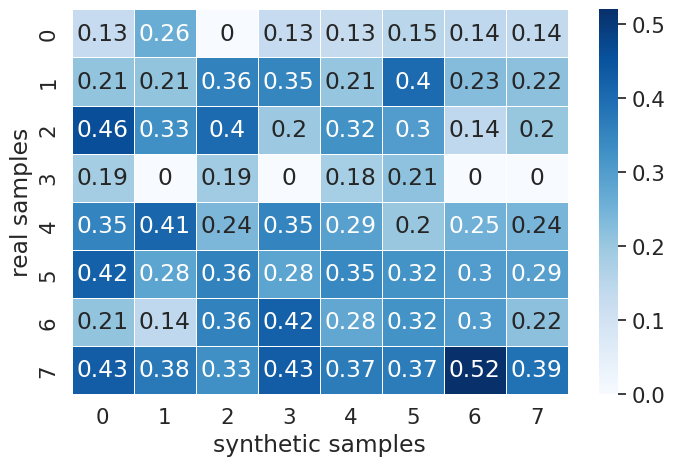

In [16]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [17]:
avg_cossim_class0 = np.mean(cosine_sim(real_class0,sampled0))
avg_cossim_class0

0.23410896986190233

Author class 1

In [18]:
real_class1= np.array(imp_feat1)
cosine_sim(real_class1,sampled1)

array([[0.28284271, 0.24618298, 0.15430335, ..., 0.26726124, 0.14142136,
        0.14744196],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30151134, 0.31491833, 0.32897585, ..., 0.39886202, 0.36181361,
        0.31434731],
       ...,
       [0.14142136, 0.12309149, 0.        , ..., 0.26726124, 0.        ,
        0.14744196],
       [0.2       , 0.17407766, 0.        , ..., 0.18898224, 0.        ,
        0.        ],
       [0.08944272, 0.23354968, 0.19518001, ..., 0.3380617 , 0.17888544,
        0.09325048]])

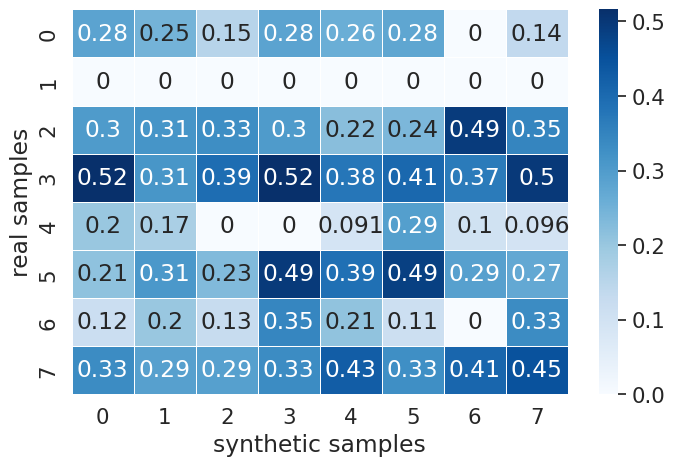

In [19]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [20]:
avg_cossim_class1 = np.mean(cosine_sim(real_class1,sampled1))
avg_cossim_class1

0.24155427516788916

Author class 2

In [21]:
real_class2= np.array(imp_feat2)
cosine_sim(real_class2,sampled2)

array([[0.12038585, 0.11111111, 0.24618298, ..., 0.23570226, 0.22222222,
        0.23094011],
       [0.44232587, 0.47628967, 0.30151134, ..., 0.28867513, 0.20412415,
        0.35355339],
       [0.44232587, 0.36288737, 0.40201513, ..., 0.28867513, 0.58969198,
        0.47140452],
       ...,
       [0.29488391, 0.        , 0.15075567, ..., 0.        , 0.27216553,
        0.14142136],
       [0.24077171, 0.22222222, 0.12309149, ..., 0.11785113, 0.11111111,
        0.11547005],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

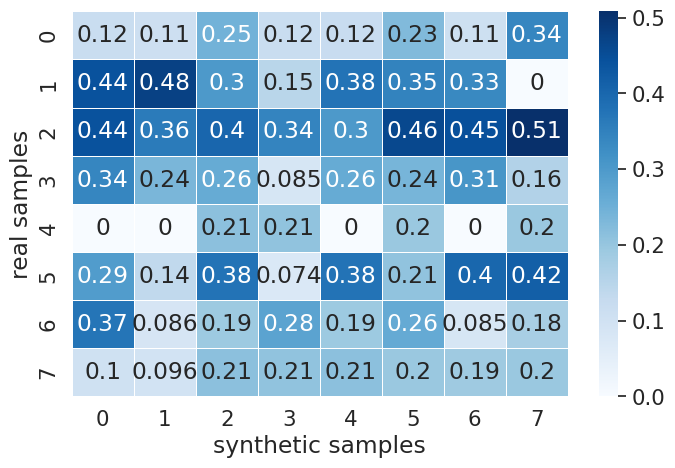

In [22]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [23]:
avg_cossim_class2 = np.mean(cosine_sim(real_class2,sampled2))
avg_cossim_class2

0.1891890481381758

Author class 3

In [24]:
real_class3 = np.array(imp_feat3)
cosine_sim(real_class3,sampled3)

array([[0.        , 0.13608276, 0.13363062, ..., 0.12909944, 0.13363062,
        0.        ],
       [0.16329932, 0.        , 0.16903085, ..., 0.24494897, 0.08451543,
        0.16903085],
       [0.34641016, 0.30429031, 0.47809144, ..., 0.34641016, 0.23904572,
        0.41833001],
       ...,
       [0.        , 0.        , 0.        , ..., 0.18257419, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

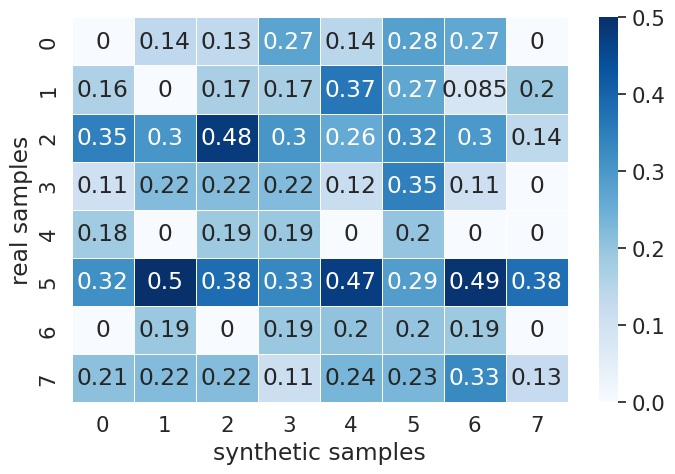

In [25]:
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(cosine_sim(real_class3[:8],sampled3[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [26]:
avg_cossim_class3 = np.mean(cosine_sim(real_class3,sampled3))
avg_cossim_class3

0.21166159532315737

In [27]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2 + avg_cossim_class3)/4

0.2191284721227812